### Problem Statement

The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 
You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 
You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 
Dimensions: (to be added later)

Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                   'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
                  'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
                  'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']
                  
 Learn and predict the OUTCOME variable.
 
**In the outcome column 0 means, the insurance claim has to be rejected and 1 means the insurance claim has to be accepted.**

In this Notebook we performing various form of Data Analysis process, we are going to be treating 4 major steps in data analysis for the solution to the problem.

Descriptive Analysis - This will involve charts and numbers to tell what is happening with our data records.

Diagonistics Analysis - This will involve correlation and stastical inference to find relationships among variables in the dataset.

Predictive Analysis - This involve using machine learning to make predictions for future terms.

Prescriptive Analysis - This will help to make decisions from our predictive model to solve the business problems.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
# For Plot Annotation

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission.csv')

In [6]:
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [7]:
test.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


### Investigation of Datasets

In this section, we will investigate the dataset using historical data (train data) and determine whether it is ready for Exploratory Data Analysis.

In [8]:
print('we have {} in our data'.format(train.shape))
print('we have {} in our rows'.format(train.shape[0]))
print('we have {} in our columns'.format(train.shape[1]))

we have (105000, 18) in our data
we have 105000 in our rows
we have 18 in our columns


In [9]:
### check if there is any missing values
train.isnull().sum().any()

False

In [10]:
## check the different data types in our data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

We have 6 Numeric features, 5 Integers and 7 Categorical features.

#### Checking the descriptive statistics of the Numeric and Integer features

In [11]:
train.select_dtypes(exclude='O').describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,0.827038,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648
std,279694.106053,0.138045,0.378216,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,1.000000,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


**Observation**

1. 75% of the client as a Credit Score < 70%

2. 75% of the client are with Vehicle Ownership

3. The Average Annual Mileage is 11061.

4. Some client as 15 past accidents

### Checking the category of the categorical data

In [12]:
for cat_col in train.select_dtypes('O').columns:
    print('-----------------------------------')
    print(train[cat_col].value_counts(normalize=True) * 100)

-----------------------------------
40-64    32.110476
65+      31.392381
26-39    19.064762
16-25    17.432381
Name: AGE, dtype: float64
-----------------------------------
male      62.206667
female    37.793333
Name: GENDER, dtype: float64
-----------------------------------
20-29y    35.707619
0-9y      31.534286
10-19y    23.905714
30y+       8.852381
Name: DRIVING_EXPERIENCE, dtype: float64
-----------------------------------
high school    44.371429
university     29.733333
none           25.895238
Name: EDUCATION, dtype: float64
-----------------------------------
upper class      48.829524
working class    23.289524
middle class     14.036190
poverty          13.844762
Name: INCOME, dtype: float64
-----------------------------------
before 2015    54.772381
after 2015     45.227619
Name: VEHICLE_YEAR, dtype: float64
-----------------------------------
Sports Car    32.944762
Sedan         26.780952
HatchBack     23.714286
SUV           16.560000
Name: TYPE_OF_VEHICLE, dtype: f

### Correct the datatypes of marriage, children and Vehicle Ownership

In [13]:
correct_dt = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']

In [14]:
for col in correct_dt:
    train[col] = train[col].astype('int64')
    test[col] = test[col].astype('int64')

### Descriptive Analysis ( Exploratory Data Analysis)

In this section, we will use data visualization to explore our dataset.

The data will be explored using **Uni-Variate**, **Bi-Variate**, and **Multi-Variate** Analysis.

#### Uni-Variate Analysis.

**Question 1**

What is the percentage of OUTCOME?

In [15]:
y = train['OUTCOME']

In [16]:
### having outcome label

train['OUTCOME'] = train['OUTCOME'].replace({0:'Rejected', 1:'Accepted'})

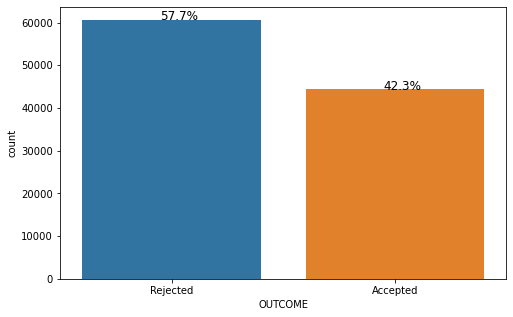

In [17]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='OUTCOME', data=train, order = train['OUTCOME'].value_counts().index)
without_hue(ax, train['OUTCOME'])

**Observation**

57% of the claims are rejected and 42.3% of the claims are accepted.

**Question 2**

What is the gender ratio of the clients?

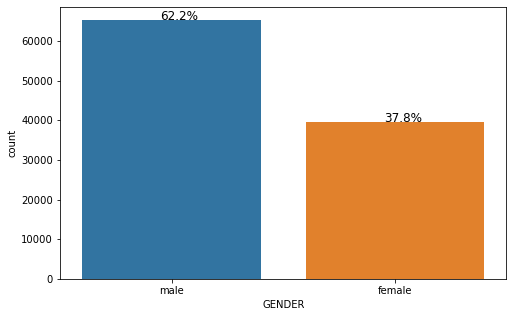

In [18]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='GENDER', data=train, order = train['GENDER'].value_counts().index)
without_hue(ax, train['GENDER'])

**Observation**

Males account for 62.2% of clients, while females account for 37.8%.

**Question 3**

Which age group do the majority of the clients belong to?

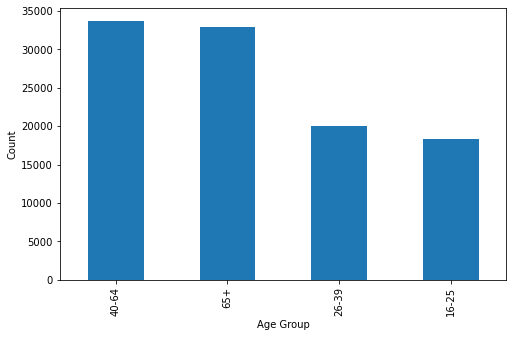

In [19]:
plt.figure(figsize=(8,5))
train['AGE'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count');

**Observation**

The majority of the clients are over the age of 40.

**Question 4**

Driving Experience of Clients

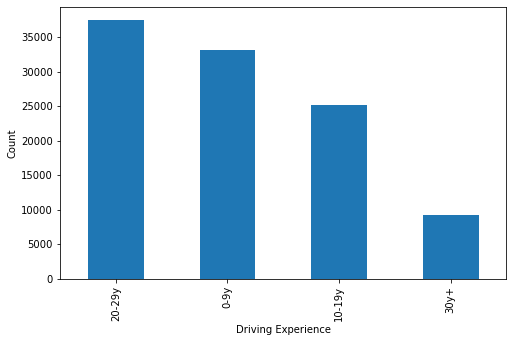

In [20]:
plt.figure(figsize=(8,5))
train['DRIVING_EXPERIENCE'].value_counts().plot(kind='bar')
plt.xlabel('Driving Experience')
plt.ylabel('Count');

**Observation**

The majority of our clients have 20-29 years of driving experience, while the fewest have 30+ years.

**Question 5**

Clients' educational level ratio

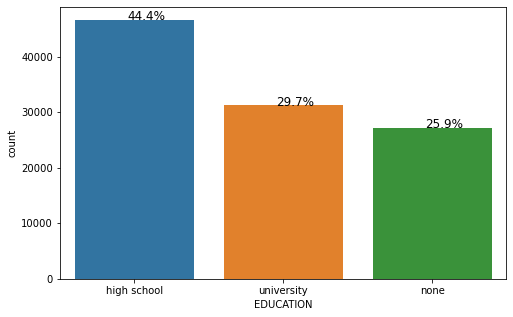

In [21]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='EDUCATION', data=train, order = train['EDUCATION'].value_counts().index)
without_hue(ax, train['EDUCATION'])

**Observation**

44.4% of the clients have a high school diploma, 29.7% have a university diploma, and 25.9% have no education.

**Question No. 6**

Clients' income level ratio.

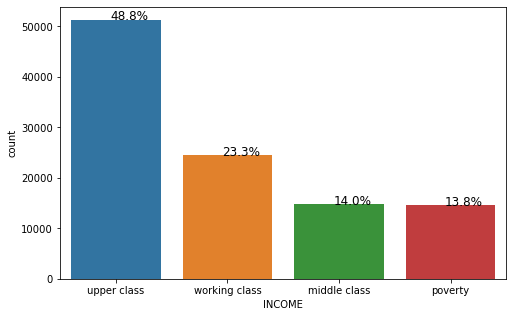

In [22]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='INCOME', data=train, order = train['INCOME'].value_counts().index)
without_hue(ax, train['INCOME'])

**Observation**

48.8%% of the clients are upper class, 23.3% are working class, 14.0 are middle class and we have 13.8 of clients categorize income to be in poverty.

**Question 7**

The Most Common Vehicle Types

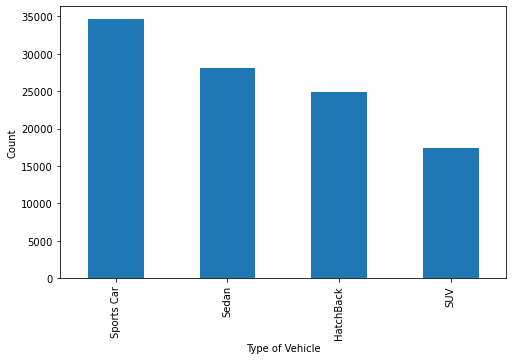

In [23]:
plt.figure(figsize=(8,5))
train['TYPE_OF_VEHICLE'].value_counts().plot(kind='bar')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count');

**Observation**

Sports car > Sedan > HatchBack > SUV

**Question 8**

The Distribution of our numeric features

In [24]:
train.select_dtypes('float64').columns

Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE'], dtype='object')

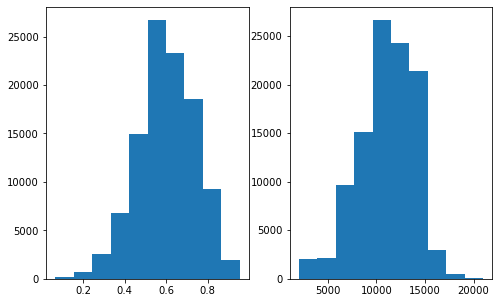

In [25]:
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1) 
plt.hist(data = train, x = 'CREDIT_SCORE', bins=10);

plt.subplot(1, 2, 2)
plt.hist(data = train, x = 'ANNUAL_MILEAGE');

**Observation**

The distribution appears to be normal.

### Bi-Variate Analysis

In this section, we are going to be comparing 2 variables at a time.

**Question No. 9**

What is the gender ratio in terms of outcome?

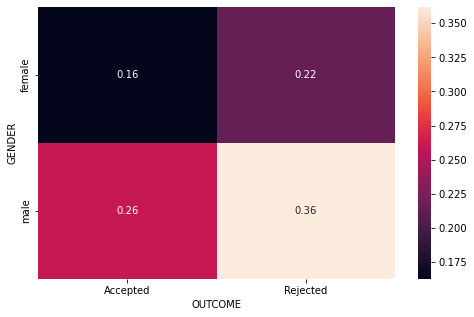

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.crosstab(train['GENDER'], train['OUTCOME'], normalize=True), annot=True);

**Observation**

Female claims are accepted at 16% and rejected at 22%.

26% of male claims are accepted, while 36% are denied.

**Question 10**

What is the age group ratio in relation to the outcome?

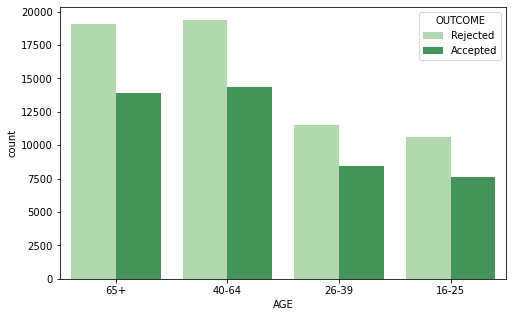

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data = train, x = 'AGE', hue = 'OUTCOME', palette = 'Greens', 
              order=['65+', '40-64', '26-39', '16-25']);

**Observation**

The Age Group with Outcome appears to be balanced across various Age Groups.

**Question  11**

Outcome based on social and economic status.

In [28]:
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000.0,0,0,0,Rejected,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000.0,0,0,0,Accepted,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000.0,0,0,0,Accepted,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000.0,1,0,0,Accepted,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000.0,0,0,1,Rejected,Sedan


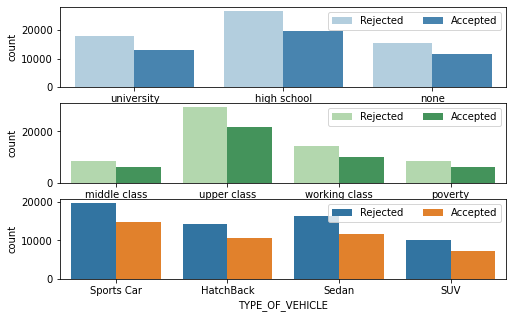

In [29]:
plt.figure(figsize = [8, 5])


ax = plt.subplot(3, 1, 1)
sns.countplot(data = train, x = 'EDUCATION', hue = 'OUTCOME', palette = 'Blues')
ax.legend(ncol = 2)

# subplot 2 
ax = plt.subplot(3, 1, 2)
sns.countplot(data = train, x = 'INCOME', hue = 'OUTCOME', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

ax = plt.subplot(3, 1, 3)
sns.countplot(data = train, x = 'TYPE_OF_VEHICLE', hue = 'OUTCOME')
ax.legend(loc = 1, ncol = 2)

plt.show()

**Observation**

The distribution of the Rejected and Accepted are similar across each social economic status.

**Question 12**

Is there a correlation between credit score and annual mileage

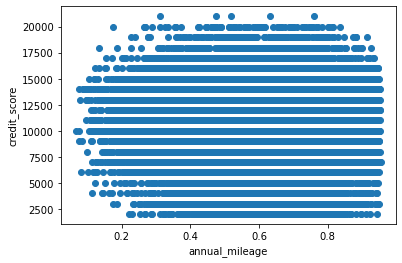

In [48]:
plt.scatter(x='CREDIT_SCORE', y='ANNUAL_MILEAGE', data=train)
plt.ylabel('credit_score')
plt.xlabel('annual_mileage');

In [31]:
train['ANNUAL_MILEAGE'].corr(train['CREDIT_SCORE'])

-0.02031295599173113

**Observation**

We can see a weakly negative correlation between them.

Diagonistics Analysis (Statistical Analysis)

In this section, we'll use the Chi-Square method to examine how different category variables relate to the **OUTCOME**.

**Note: Finding relationships between categorical data through correlation is one of the pitfalls of data science.**

##### Create our hypothesis

H0 - There was no significant difference between the feature and the OUTCOME class.

H1 - The checked feature differs significantly from the OUTCOME class.

If the p-value is greater than 0.05, the feature had no significant effect on the OUTCOME class, and vice versa.

**Transforming our categorical data**

In [32]:
age_group = {'65+':4, '40-64':3, '26-39':2 ,'16-25':1}
de_group = {'30y+':4, '20-29y':3,'10-19y':2,'0-9y':1}
edu_group = {'university':3, 'high school':2, 'none':1}
income_group = {'upper class':4, 'working class':3,'middle class':2, 'poverty':1}
vh_group = {'after 2015':2, 'before 2015':1}

In [33]:
train['AGE'] = train['AGE'].map(age_group)

train['DRIVING_EXPERIENCE'] = train['DRIVING_EXPERIENCE'].map(de_group)

train['EDUCATION'] = train['EDUCATION'].map(edu_group)

train['INCOME'] = train['INCOME'].map(income_group)

train['VEHICLE_YEAR'] = train['VEHICLE_YEAR'].map(vh_group)

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [35]:
for col in train.select_dtypes('O').columns:
  train[col] = lb.fit_transform(train[col])

In [36]:
cat_col = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'TYPE_OF_VEHICLE','MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP']

In [37]:
X = train[cat_col]
y = train['OUTCOME']

In [38]:
f_score=chi2(X,y)   #returns f score and p value 
f_score

(array([0.26995697, 5.4258679 , 4.36143081, 0.27696181, 0.0275135 ,
        0.01314101, 0.63365396, 1.58646617, 0.17611496, 0.17157393]),
 array([0.60336064, 0.01984057, 0.03676142, 0.5986995 , 0.86825772,
        0.90873503, 0.42601818, 0.20783175, 0.67473347, 0.67871677]))

In [39]:
p_value=pd.Series(f_score[1],index=X.columns)

In [40]:
p_value.sort_values(ascending=True,inplace=True)

In [41]:
p_value

GENDER                0.019841
DRIVING_EXPERIENCE    0.036761
MARRIED               0.207832
TYPE_OF_VEHICLE       0.426018
EDUCATION             0.598700
AGE                   0.603361
CHILDREN              0.674733
VEHICLE_OWNERSHIP     0.678717
INCOME                0.868258
VEHICLE_YEAR          0.908735
dtype: float64

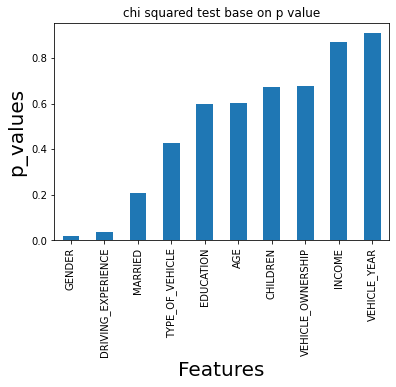

In [42]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [43]:
p_value_features = p_value.reset_index().rename(columns={'index':'features', 0:'p_value'})

In [44]:
level_of_significance = 0.05
p_value_features['Decision'] = np.where(p_value_features['p_value'] < 0.05, 'Reject Null Hypothesis', 'Accept Null Hypothesis')

In [45]:
p_value_features

,features,p_value,Decision
0,GENDER,0.019841,Reject Null Hypothesis
1,DRIVING_EXPERIENCE,0.036761,Reject Null Hypothesis
2,MARRIED,0.207832,Accept Null Hypothesis
3,TYPE_OF_VEHICLE,0.426018,Accept Null Hypothesis
4,EDUCATION,0.598700,Accept Null Hypothesis
5,AGE,0.603361,Accept Null Hypothesis
6,CHILDREN,0.674733,Accept Null Hypothesis
7,VEHICLE_OWNERSHIP,0.678717,Accept Null Hypothesis
8,INCOME,0.868258,Accept Null Hypothesis
9,VEHICLE_YEAR,0.908735,Accept Null Hypothesis


**Conclusion**

Only Gender and Driving Experience have a significant difference with the OUTCOME class and will be a good categorical predictor, according to our findings.

### We can examine the relationship between some Independent features.

In [46]:
def chi_check(var1, var2, significance_level=None):
  tab_class = pd.crosstab(train[var1], train[var2], margins=True)
  tab_values = np.array([tab_class.iloc[0].values,
                  tab_class.iloc[1].values])
  stat, p, dof, expected_value= chi2_contingency(tab_values)
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else:
    print('ACCEPT NULL HYPOTHESIS')

**Check the association between Gender and Driving Experience**

In [47]:
chi_check('GENDER', 'DRIVING_EXPERIENCE', 0.05)

p value: 0.27245514955949623
ACCEPT NULL HYPOTHESIS
